# Example over time

Examples so far have shownhow to use aurel to automatically calculate relativistic terms for a given coordinate time. In practice you may be interested in seeing how these quantities evolve over time. For this the aurel package has the function `over_time` to do this, here we demonstrate how this is used.

First we need a big dictionnary containing the spacetime/matter: 

In [1]:
import time

from aurel.solutions import LCDM as sol
import aurel

# Define grid and finite difference class
param = { 'Nx': 64, 'Ny': 64, 'Nz': 64,
          'xmin': - 32.0, 'ymin': - 32.0, 'zmin': - 32.0,
          'dx': 1.0, 'dy': 1.0, 'dz': 1.0}
fd = aurel.FiniteDifference(param)
x, y, z = fd.cartesian_coords

Nt = 512

duration = []
for nbr_processes in [1, 8]:#, 8]:
    print(f"Number of processes: {nbr_processes}")
    # Import spacetime / matter solution from simulation or analytic calculation
    # Here we use the analytic FLRW solution with the LambdaCDM model as an example
    data = {key:[] for key in ['t', 'gammadown3', 'Kdown3', 'rho']}
    for t in range(1, Nt+1):
        data['t'] += [t]
        data['gammadown3'] += [sol.gammadown3(t, x, y, z)]
        data['Kdown3'] += [sol.Kdown3(t, x, y, z)]
        data['rho'] += [sol.rho(t)]
    print(data.keys())
    start = time.time()
    data = aurel.over_time(data, fd, vars=['null_ray_exp'], 
                           nbr_processes=nbr_processes, veryverbose=True,
                           Lambda=sol.Lambda)
    duration += [time.time() - start]
    print(duration[-1], data.keys())
    del data
print(duration)

4th order finite difference schemes are defined
Number of processes: 1
dict_keys(['t', 'gammadown3', 'Kdown3', 'rho'])
Processing t = 1


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Now processing remaining time steps sequentially
Processing t = 2


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 3


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 4


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 5


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 6


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 7


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 8


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 9


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 10


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 11


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 12


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 13


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 14


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 15


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 16


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 17


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 18


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 19


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 20


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 21


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 22


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 23


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 24


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 25


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 26


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 27


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 28


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 29


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 30


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 31


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 32


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 33


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 34


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 35


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 36


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 37


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 38


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 39


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 40


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 41


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 42


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 43


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 44


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 45


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 46


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 47


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 48


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 49


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 50


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 51


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 52


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 53


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 54


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 55


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 56


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 57


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 58


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 59


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 60


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 61


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 62


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 63


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 64


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing t = 65


<IPython.core.display.Latex object>

KeyboardInterrupt: 

In [7]:
!jupyter kernelspec list

Available kernels:
  python3    /Users/rlm36AA/Library/Python/3.13/share/jupyter/kernels/python3


In [9]:
!pip show aurel

Name: aurel
Version: 0.0.post4
Summary: A Python package for general relativity calculations.
Home-page: 
Author: 
Author-email: Robyn L Munoz <r.l.munoz@sussex.ac.uk>
License-Expression: GPL-3.0-or-later
Location: /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages
Requires: dask, glob2, h5py, ipykernel, ipython, jax, jaxlib, jupyter, matplotlib, numpy, scipy, spinsfast, sympy, tqdm
Required-by: 


In [1]:
import aurel
import numpy as np

# Define grid and finite difference class
param = { 'Nx': 64, 'Ny': 64, 'Nz': 64,
          'xmin': 0.0, 'ymin': 0.0, 'zmin': 0.0,
          'dx': 16.0, 'dy': 16.0, 'dz': 16.0}
fd = aurel.FiniteDifference(param)
x, y, z = fd.cartesian_coords

# Import spacetime / matter solution from simulation or analytic calculation
# Here we use the analytic FLRW solution with the LambdaCDM model as an example
from aurel.solutions import LCDM as sol
data = {key:[] for key in ['t', 'gammadown3', 'Kdown3', 'rho']}
nbr_iterations = 32
tarray = np.linspace(0.5, 5.0, nbr_iterations)
for t in tarray:
    data['t'] += [t]
    data['gammadown3'] += [sol.gammadown3(t, x, y, z)]
    data['Kdown3'] += [sol.Kdown3(t, x, y, z)]
    data['rho'] += [sol.rho(t)]

4th order finite difference schemes are defined


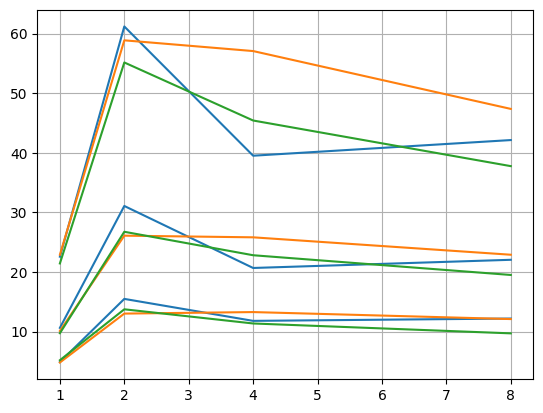

In [ ]:
import matplotlib.pyplot as plt

#No chunks
plt.plot([1,2,4,8], [4.898695945739746, 15.492023944854736, 11.806664943695068, 12.197628736495972], color='C0')
plt.plot([1,2,4,8], [10.634377241134644, 31.08058190345764, 20.680219888687134, 22.053412199020386], color='C0')
plt.plot([1,2,4,8], [22.573524951934814, 61.191614866256714, 39.51253700256348, 42.1372172832489], color='C0')
#With chunks)
plt.plot([1,2,4,8], [4.82712197303772, 13.028093814849854, 13.282617807388306, 12.109467267990112], color='C1')
plt.plot([1,2,4,8], [10.123609781265259, 26.099441051483154, 25.822314977645874, 22.901034116744995], color='C1')
plt.plot([1,2,4,8], [22.90189266204834, 58.867915868759155, 57.06700015068054, 47.364723205566406], color='C1')
#With chunks *2)
plt.plot([1,2,4,8], [5.207178115844727, 13.747862100601196, 11.369174003601074, 9.711343050003052], color='C2')
plt.plot([1,2,4,8], [9.73825979232788, 26.752702951431274, 22.816540002822876, 19.507436990737915], color='C2')
plt.plot([1,2,4,8], [21.440007209777832, 55.15391182899475, 45.41793990135193, 37.76304006576538], color='C2')
#With chunks *3)
plt.plot([1,2,4,8], [5.3610639572143555, 12.560078859329224, 9.673726081848145, 9.940133094787598], color='C3')
plt.plot([1,2,4,8], [9.813225984573364, 23.49789309501648, 20.61756205558777, 18.59974193572998], color='C3')
plt.plot([1,2,4,8], , color='C3')
plt.grid()

In [31]:
data = aurel.over_time(data, fd, vars=['null_ray_exp'], nbr_processes=4)
print(data.keys())

Processing t = 0.5


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Now processing time steps in parallel with Dask client and nbr_processes = 4
Done!
dict_keys(['t', 'gammadown3', 'Kdown3', 'rho', 'null_ray_exp'])


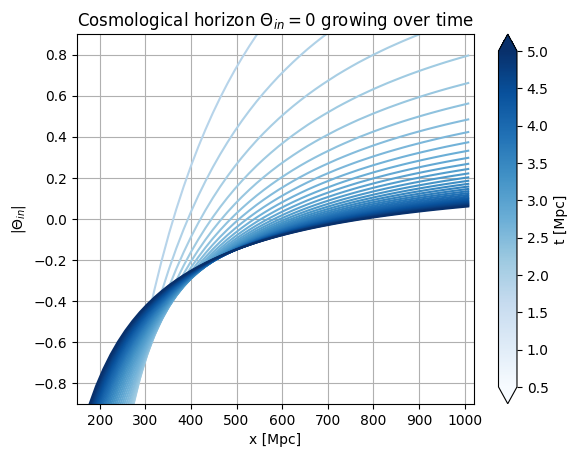

In [43]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
Bcolors = cm.Blues(np.linspace(0.3, 1, nbr_iterations))
for i in range(nbr_iterations):
    plt.plot(fd.xarray, data['null_ray_exp'][i][1][:,0,0], color=Bcolors[i])
plt.grid()
plt.xlim(150, 1020)
plt.ylim(-0.9, 0.9)
plt.xlabel(r'x [Mpc]')
plt.ylabel(r"$|\Theta_{in}|$")
plt.title(r'Cosmological horizon $\Theta_{in} = 0$ growing over time')

# Colorbar
norm = mcolors.Normalize(vmin=min(data['t']), vmax=max(data['t']))
sm = cm.ScalarMappable(cmap=cm.Blues, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), extend='both')
cbar.set_label(r"t [Mpc]")